# Data Visualisation 1

Data visualisation is an incredibly useful skill to develop! It can be an invaluable way to explore your data and present your findings.

In the first half of this session, we will discuss what makes a good figure.

In the second half, we will see how we apply these principles of data visualisation in practice, using `ggplot2` in R.

Finally, in [Data Visualisation Part 2](https://jackedtaylor.github.io/expra-wise24/introduction/data_vis_2), we will look at how to make your figures pretty and publication-ready.

## Slides

<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vTmM5VPAZXLXr_WLmzgUvLHCYYWbkjB1IPGWdXLECFVPzSsQMhr0iGk-lsycnkZsTfvDJLL_Q4EWb10/embed?start=false&loop=false" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>

<h5>
<a href=https://docs.google.com/presentation/d/144YSoOxCWTq0bMu4qvpOQT9r0X1Y-ogFKCTRhK1i6NI/export/pdf><i class="fa-solid fa-file-pdf"></i> Download .pdf</a>
&nbsp;
<a href=https://docs.google.com/presentation/d/144YSoOxCWTq0bMu4qvpOQT9r0X1Y-ogFKCTRhK1i6NI/export/odp><i class="fa-solid fa-file"></i> Download .odp</a>
&nbsp;
<a href=https://docs.google.com/presentation/d/144YSoOxCWTq0bMu4qvpOQT9r0X1Y-ogFKCTRhK1i6NI/export/pptx><i class="fa-solid fa-file-powerpoint"></i> Download .pptx</a>
</h5>

## Try it Out!

### Setup

We will be using `ggplot2` for data visualisation in R. This is the most popular package for data visualisation in R, and is extremely flexible.

In [1]:
options(repr.plot.width=4, repr.plot.height=3.5)

In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




You can import the data we will be using like so:

In [3]:
exp_dat <- read_csv("https://raw.githubusercontent.com/JackEdTaylor/expra-wise24/master/lecture/static/data_vis_dat.csv")

Rows: 201 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): subj_id, time
dbl (2): read_score, memory_score

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


This simulated dataset contains scores in a reading task and a memory task from *N*=67 participants at three times in the day: morning, midday, and evening.

In [4]:
print(exp_dat)

# A tibble: 201 x 4
   subj_id time    read_score memory_score
   <chr>   <chr>        <dbl>        <dbl>
 1 s01     morning       76.8         67.2
 2 s01     midday        95.7         98.4
 3 s01     evening       94.3         95.0
 4 s02     morning       79.5         54.2
 5 s02     midday        97.2         88.5
 6 s02     evening       98.1         91.1
 7 s03     morning       76.2         69.1
 8 s03     midday        91.1         98.2
 9 s03     evening       85.2         94.9
10 s04     morning       89.5         92.5
# i 191 more rows


### The `ggplot2` "Canvas"

When we create a `ggplot2` object, the first function we use is `ggplot()`. The first argument is the dataframe we would like to plot. The second argument contains the `aes()` specifications, which says which variables in the data should be mapped to which aesthetics.

Let's see an example, where we say we want to plot reading scores from `exp_dat` on the x axis.

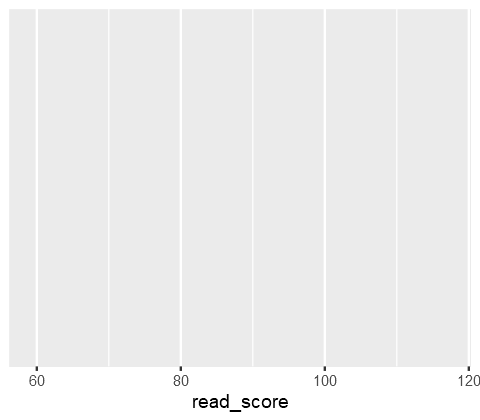

In [5]:
ggplot(exp_dat, aes(x = read_score))

What gives - where is our plot?

Well, we've told `ggplot2` what to put on the x axis, but we haven't said what to actually do with it!

We've created a "blank canvas" - now we need to add plot objects. In `ggplot2` these are referred to as *Geoms*, and we add them with `geom_*` functions.

### Plotting Distributions

We can plot a histogram with the `geom_histogram()` function. We can simply add this to our code from before. `ggplot2` will then automatically know that the y axis should contain counts.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


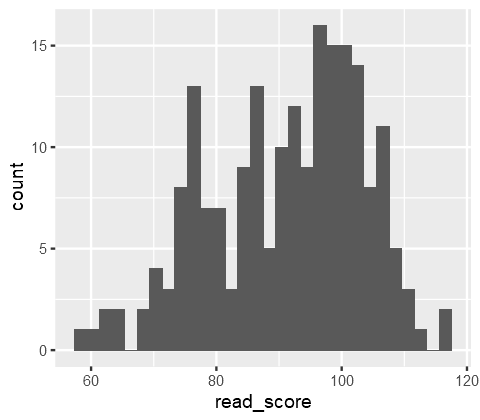

In [6]:
ggplot(exp_dat, aes(x = read_score)) +
  geom_histogram()

Notice that we get a warning from `ggplot2` that it is using the default of `bins = 30` for the `geom_histogram()` function, which means there are a total of 30 bins. It is recommended to pick a number of bins, or a bin width, that makes sense for your data. For example, if we want each bin to have a width of 10, we could write:

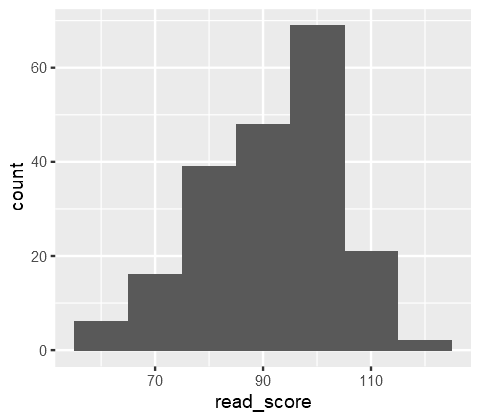

In [7]:
ggplot(exp_dat, aes(x = read_score)) +
  geom_histogram(binwidth = 10)

Similarly, we can plot the empirical probability density with the `geom_density()` function.

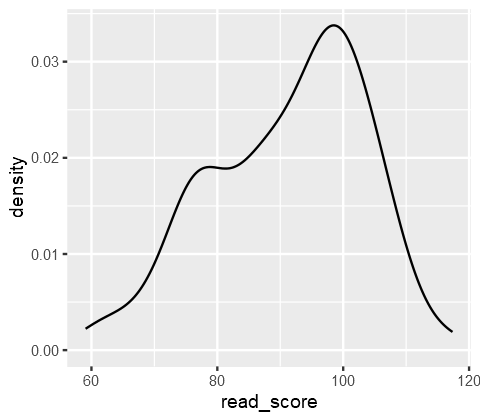

In [8]:
ggplot(exp_dat, aes(x = read_score)) +
  geom_density()

#### Check your Knowledge!

**a)** Plot the density of memory scores.

**b)** Plot a histogram of memory scores, with a bin width of 5.

**c)** Plot a histogram of memory scores, with 5 bins overall.

#### Solutions

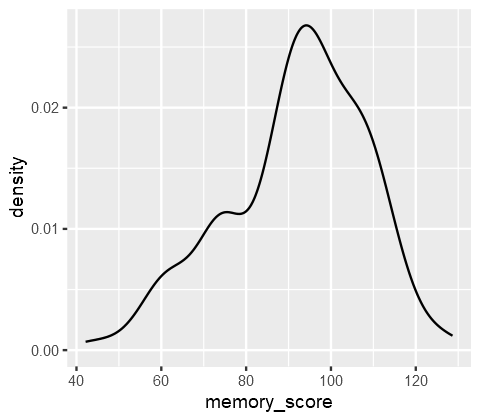

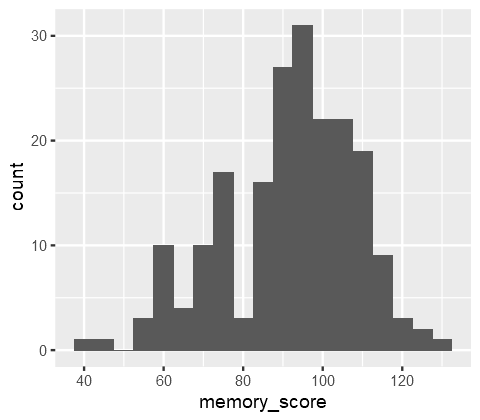

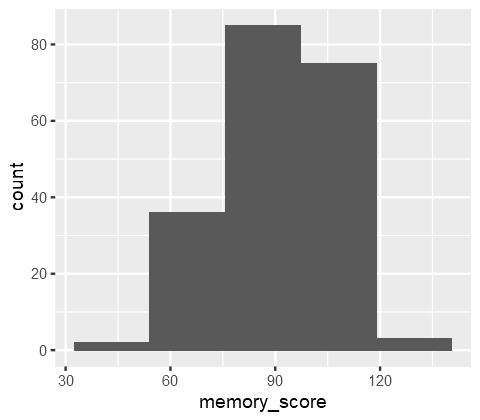

In [9]:
# a
ggplot(exp_dat, aes(x = memory_score)) +
  geom_density()

# b
ggplot(exp_dat, aes(x = memory_score)) +
  geom_histogram(binwidth = 5)

# c
ggplot(exp_dat, aes(x = memory_score)) +
  geom_histogram(bins = 5)

### Comparing Distributions by Group

Let's say we also want to plot the distribution of reading scores for each experimental session separately. We can do this by saying we want the `time` variable (`"morning"`, `"midday"`, `"evening"`) to be mapped to the `colour` aesthetic.

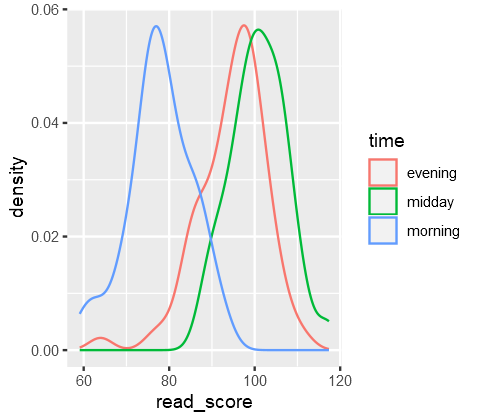

In [10]:
ggplot(exp_dat, aes(x = read_score, colour = time)) +
  geom_density()

This shows us that reading scores were poorest in the morning, and best at midday. Other useful ways to compare distributions include the violin plot. A violin plot is a density plot mirrored across zero.

This time, we want the time of day to be on the `x` axis, and the reading scores to be on the `y` axis.

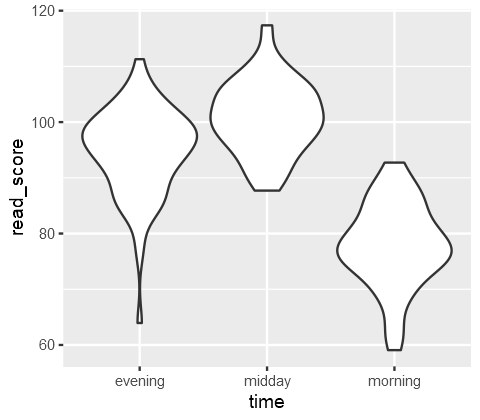

In [11]:
ggplot(exp_dat, aes(x=time, y=read_score)) +
  geom_violin()

One of the nice things about `ggplot2` is that the `geom_*` functions are additive. We can just add geom objects on top of one another. For example, you may want to place a [boxplot](https://en.wikipedia.org/wiki/Box_plot) on top of a violin plot. You can see the `ggplot2` documentation for details on [how to interpret the boxplot](https://ggplot2.tidyverse.org/reference/geom_boxplot.html#summary-statistics).

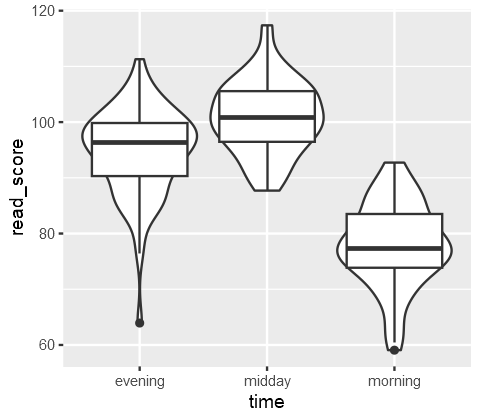

In [12]:
ggplot(exp_dat, aes(x=time, y=read_score)) +
  geom_violin() +
  geom_boxplot()

Finally, we can also just create a categorical scatter plot, plotting individual points in the data with `geom_point()`.

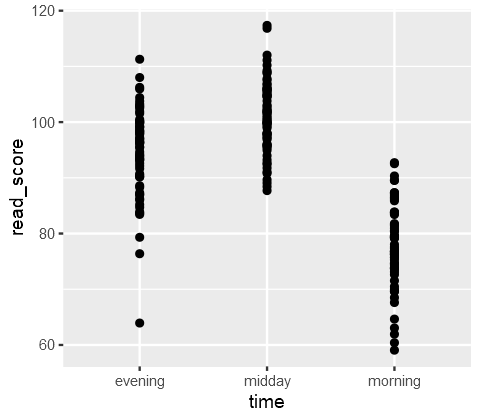

In [13]:
ggplot(exp_dat, aes(x=time, y=read_score)) +
  geom_point()

This is sometimes easier to read if we add "jitter" (random noise) to the x axis, rather than plotting all points in a line. We can do this with the `position_jitter()` function. The `width` argument tells `ggplot2` how wide we want the jittered points to be. **Note that we have to add `height=0` to avoid the function from also jittering our y values!**

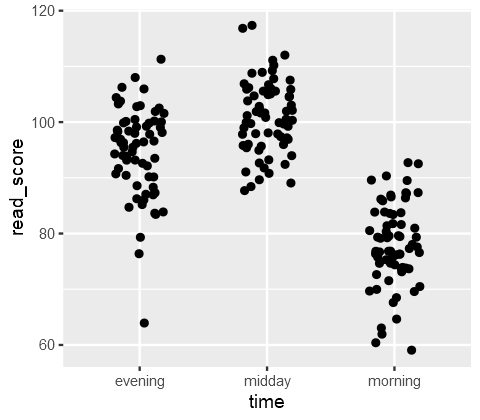

In [14]:
ggplot(exp_dat, aes(x=time, y=read_score)) +
  geom_point(position = position_jitter(width = 0.2, height = 0))

#### Check your Knowledge!

**a)** Overlay density plots of memory scores for each experimental session. Notice any similarities/differences to the pattern with reading scores?

**b)** Create a categorical scatter plot of memory scores for each session, with a small amount of random jitter, and overly on top of a violin plot.

#### Solutions

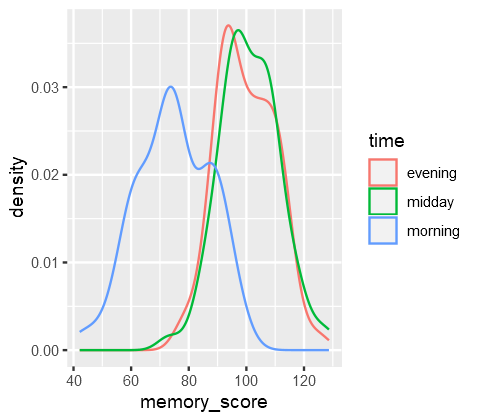

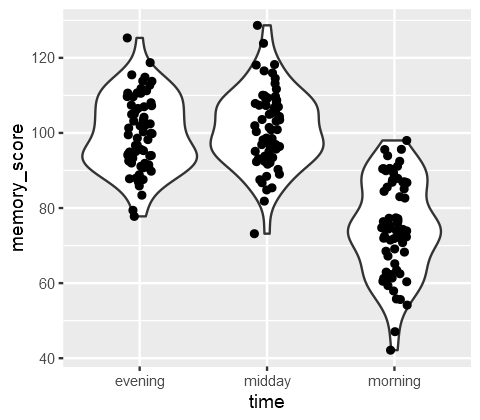

In [15]:
# a
ggplot(exp_dat, aes(x = memory_score, colour = time)) +
  geom_density()

# b
ggplot(exp_dat, aes(x=time, y=memory_score)) +
  geom_violin() +
  geom_point(position = position_jitter(width=0.1, height=0))

### Scatter Plots

Let's look at the relationship between reading scores and memory scores with `geom_point()`.

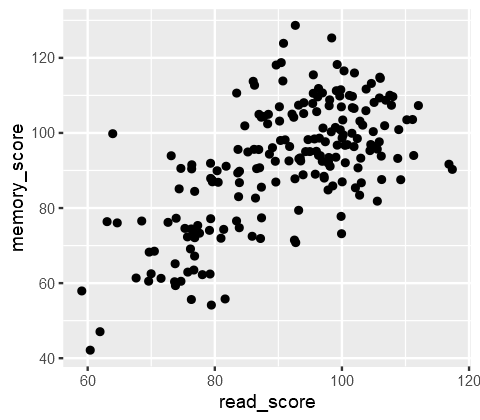

In [16]:
ggplot(exp_dat, aes(x=read_score, y=memory_score)) +
  geom_point()

This looks like a positive correlation! It seems to say that participants' reading scores and memory scores are correlated. We can plot this relationship with the `geom_smooth()` function.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


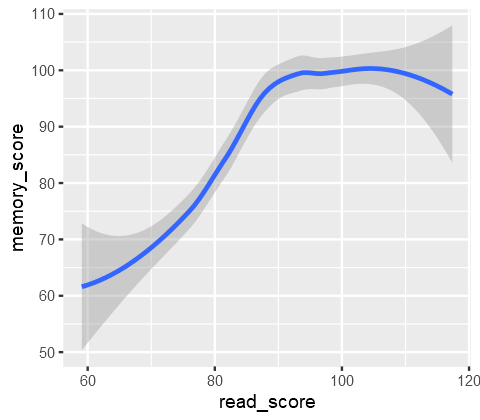

In [17]:
ggplot(exp_dat, aes(x=read_score, y=memory_score)) +
  geom_smooth()

This plots a [LOESS model](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/loess) to predict memory score as a function of reading score - this is a non-linear estimate of the local relationship. The middle blue line shows the estimated relationship, and the 95% confidence interval.

If we want to fit a simple linear model instead, we can just pass `method = "lm"` to the function.

`geom_smooth()` using formula = 'y ~ x'


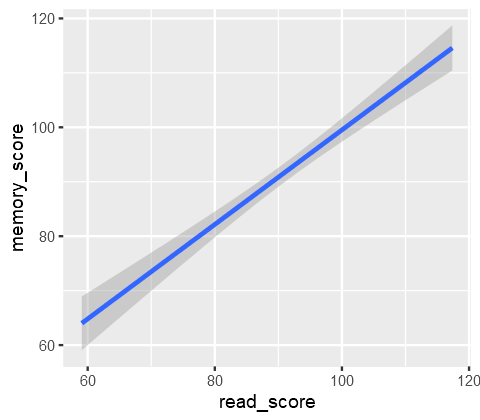

In [18]:
ggplot(exp_dat, aes(x=read_score, y=memory_score)) +
  geom_smooth(method = "lm")

#### Check your Knowledge!

**a)** Overlay the linear model estimates from `geom_smooth()` on top of a scatter plot of all points.

**b)** Does this correlation differ by experimental session time? Find a way to plot the scatter plot with linear models fit to each experimental session time separately. What conclusion do you draw from this plot?

**c)** Would you reach the same conclusion with a `loess` model?

#### Solutions

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


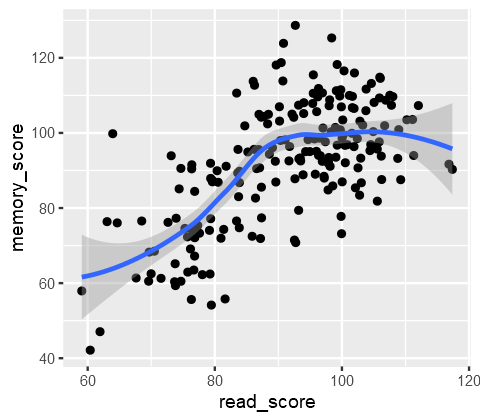

`geom_smooth()` using formula = 'y ~ x'


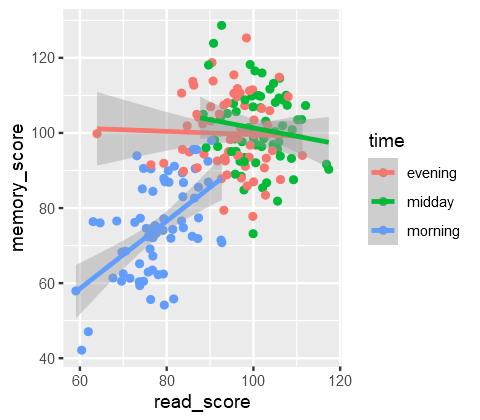

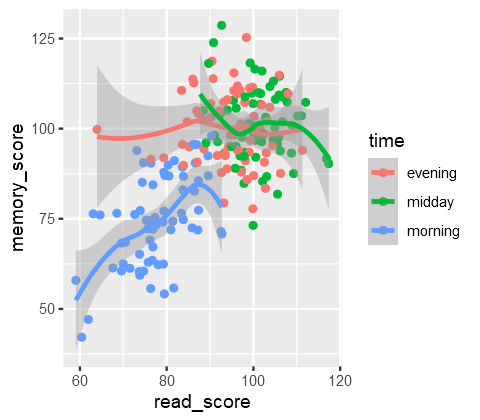

In [19]:
# a
ggplot(exp_dat, aes(x=read_score, y=memory_score)) +
  geom_point() +
  geom_smooth()

# b
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm")

# c
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="loess")

### Combining Data Visualisation with Data Wrangling

Let's have another look at the data. Notice that each participant occurs multiple times - we have one row for each combination of `subj_id` and `time`.

In [20]:
print(exp_dat)

# A tibble: 201 x 4
   subj_id time    read_score memory_score
   <chr>   <chr>        <dbl>        <dbl>
 1 s01     morning       76.8         67.2
 2 s01     midday        95.7         98.4
 3 s01     evening       94.3         95.0
 4 s02     morning       79.5         54.2
 5 s02     midday        97.2         88.5
 6 s02     evening       98.1         91.1
 7 s03     morning       76.2         69.1
 8 s03     midday        91.1         98.2
 9 s03     evening       85.2         94.9
10 s04     morning       89.5         92.5
# i 191 more rows


Let's imagine we want to plot the correlation between each participant's reading scores at different times of day. How would we do this?

The problem is that the reading scores from all times of day are in the same column - we are in *Long Format*. We can simply [pivot our data](https://jackedtaylor.github.io/expra-wise24/introduction/data_wrangling_2.html#wide-and-long-data-formatting) into *Wide Format*.

In [21]:
pivot_wider(exp_dat, id_cols=subj_id, names_from=time, values_from=read_score)

subj_id,morning,midday,evening
<chr>,<dbl>,<dbl>,<dbl>
s01,76.82,95.68,94.29
s02,79.46,97.18,98.14
s03,76.17,91.06,85.20
s04,89.52,110.21,100.13
s05,76.70,100.53,102.96
s06,73.14,92.67,98.39
s07,76.84,99.74,97.02
s08,79.58,107.54,99.82
s09,81.62,99.94,99.87


In [22]:
pivot_wider(exp_dat, id_cols=subj_id, names_from=time, values_from=read_score) |>
  print()

# A tibble: 67 x 4
   subj_id morning midday evening
   <chr>     <dbl>  <dbl>   <dbl>
 1 s01        76.8   95.7    94.3
 2 s02        79.5   97.2    98.1
 3 s03        76.2   91.1    85.2
 4 s04        89.5  110.    100. 
 5 s05        76.7  101.    103. 
 6 s06        73.1   92.7    98.4
 7 s07        76.8   99.7    97.0
 8 s08        79.6  108.     99.8
 9 s09        81.6   99.9    99.9
10 s10        68.5  102.     93.2
# i 57 more rows


If we pipe this into our plot, we can plot the correlation between participants' morning and evening reading scores like so:

`geom_smooth()` using formula = 'y ~ x'


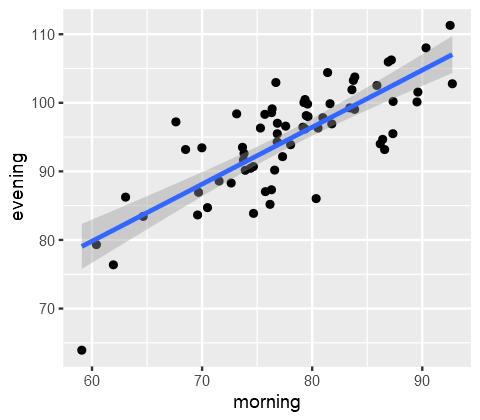

In [23]:
exp_dat |>
  pivot_wider(id_cols=subj_id, names_from=time, values_from=read_score) |>
  ggplot(aes(morning, evening)) +
  geom_point() +
  geom_smooth(method="lm")

This shows that participants' scores are somewhat correlated. This is related to the idea of test-retest reliability.

#### Check your Knowledge!

**a)** Plot the correlation between participants' morning and midday memory scores.

**b)** Tricky! Plot the correlation between morning scores in the reading test and evening scores in the memory test.

How would you interpret these results?

#### Solutions


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


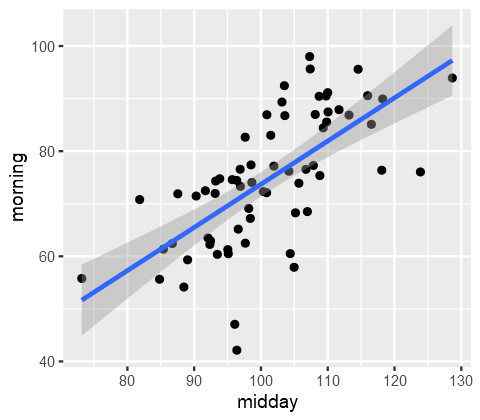

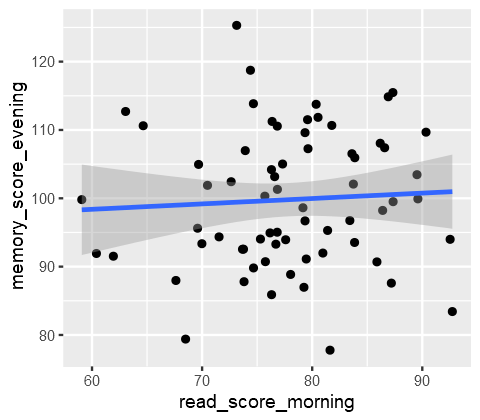

In [24]:
# a
exp_dat |>
  pivot_wider(id_cols=subj_id, names_from=time, values_from=memory_score) |>
  ggplot(aes(midday, morning)) +
  geom_point() +
  geom_smooth(method="lm")

# b
exp_dat |>
  pivot_wider(id_cols=subj_id, names_from=time, values_from=c(read_score, memory_score)) |>
  ggplot(aes(read_score_morning, memory_score_evening)) +
  geom_point() +
  geom_smooth(method="lm")